# HW#4

# 작성자 : 홍정완 (201758073)

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1) 파일을 읽어 데이터프레임을 생성한 후, 분석에 적절하지 않은 day와 month 칼럼은 삭제하시오. 수치형 특성의 이름과 범주형 특성의 이름의 리스트를 출력하시오. 

In [178]:
df = pd.read_csv('HW4.csv',delimiter=';') # delimiter 텍스트 데이터를 필드별로 구분하는 문자

In [179]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [180]:
df2=df.drop(['day','month'], axis=1)

In [181]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   duration   4521 non-null   int64 
 10  campaign   4521 non-null   int64 
 11  pdays      4521 non-null   int64 
 12  previous   4521 non-null   int64 
 13  poutcome   4521 non-null   object
 14  y          4521 non-null   object
dtypes: int64(6), object(9)
memory usage: 529.9+ KB


In [182]:
feat = [name for name in df2.columns if name != 'y']
feat

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [183]:
cat_feat = [name for name in feat if df2[name].dtype == 'object'] # 범주형 특성의 이름 리스트
cat_feat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome']

In [184]:
num_feat = [name for name in feat if name not in cat_feat] # 수치형 특성의 이름 리스트
num_feat

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

### 2) 레이블의 범주별 비율을 구하시오. 

In [185]:
df['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

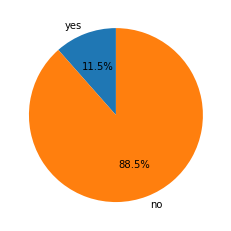

In [186]:
ratio = [521, 4000]
labels = ['yes', 'no']

plt.pie(ratio, labels=labels, autopct='%.1f%%',startangle=90)
plt.show()

### 3) 수치형 특성의 요약통계(평균, 표준편차 등)와 범주형 특성의 막대 그래프를 구하시오. 

In [187]:
# 수치형 특성의 요약통계(평균, 표준편차 등)

In [188]:
df2.describe() 

,age,balance,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000,25.000000


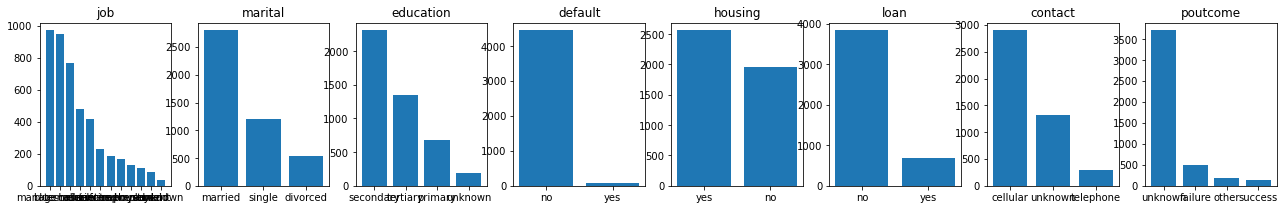

In [189]:
plt.figure(figsize=(25,3))
i = 1
for name in cat_feat:
    counts = df2[name].value_counts()
    plt.subplot(1, 9, i)
    plt.bar(counts.index, counts.values)
    plt.title(name)
    i += 1

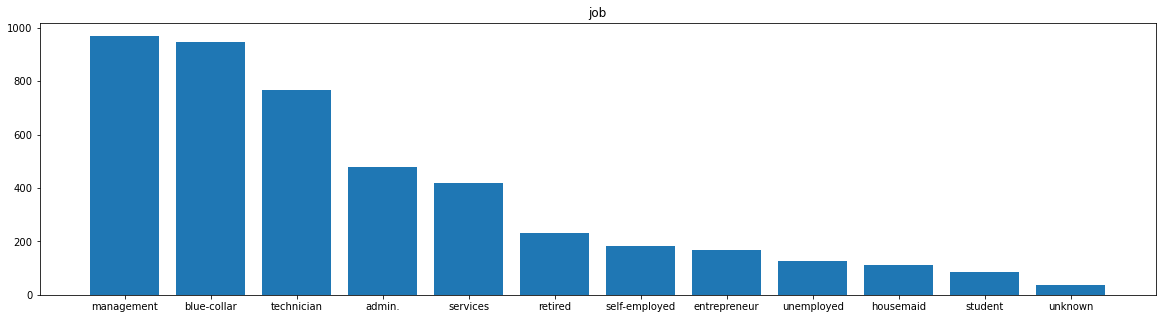

In [190]:
# job 잘안보여서 따로, 다시 그림
plt.figure(figsize=(20,5))
counts = df2.job.value_counts()
plt.bar(counts.index, counts.values)
plt.title('job');

### 4) 특성행렬을 만든 후 범주형 특성은 원-핫-인코딩한 데이터프레임(4521rows×38columns)을 구하시오. 그리고 레이블에 대하여 'yes'는 0으로 'no'는 1로 인코딩하시오. 

In [191]:
features = df2.drop('y', axis = 1)
label = df['y']

In [192]:
y = np.where(label=='no', 1, 0)

In [193]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [194]:
features_dummy = pd.get_dummies(features)

In [195]:
features_dummy

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,79,1,-1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,33,4789,220,1,339,4,0,0,0,0,...,1,0,1,1,0,0,1,0,0,0
2,35,1350,185,1,330,1,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
3,30,1476,199,4,-1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4,59,0,226,1,-1,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,329,5,-1,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
4517,57,-3313,153,1,-1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4518,57,295,151,11,-1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4519,28,1137,129,4,211,3,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0


In [196]:
X = features_dummy.to_numpy()

### 5) 데이터를 훈련용과 테스트용으로 8:2로 분할한 후, 표준화하시오. 

In [197]:
# 데이터 분할

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8,stratify=y,random_state=0)

In [198]:
X_train.shape

(3616, 38)

In [199]:
y_train.shape

(3616,)

In [200]:
# 표준화

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### 6) cross_val_score 함수(cv=5)를 사용하여 로지스틱 회귀의 초모수 C의 값을 [0.01, 0.1, 1, 10, 100]로 바꾸어 가며 최적값을 구한 후, 이 값을 사용한 테스트 스코어를 구하시오. 테스트 데이터에 대한 정오분류표를 작성하고 정기예금에 가입하지 않은 고객의 정밀도와 재현율을 구한 후 그 의미를 기술하시오. 

In [201]:
# cross_val_score 함수(cv=5)를 사용하여 로지스틱 회귀의 초모수 C의 값을 [0.01, 0.1, 1, 10, 100]로 바꾸어 가며 최적값을 구해라

In [202]:
c_list = [0.01, 0.1, 1, 10, 100]
best_score = 0
for k in c_list: 
    scores_logistic = cross_val_score(estimator=LogisticRegression(C=k, random_state=1), 
                                  X=X_train_std, y=y_train, cv=5, n_jobs=-1) 
    score = np.mean(scores_logistic) 
    print('C =', k, 'accuracy =', score) 
    if score > best_score: 
        best_score = score
        best_parameters = {'C':k}
print(best_score)
print(best_parameters)
logistic = LogisticRegression(**best_parameters, random_state=1)
logistic.fit(X_train_std, y_train)
logistic.score(X_test_std, y_test) 

C = 0.01 accuracy = 0.8990612319754246
C = 0.1 accuracy = 0.9015485660576328
C = 1 accuracy = 0.9009953157118513
C = 10 accuracy = 0.9007186905389606
C = 100 accuracy = 0.9007186905389606
0.9015485660576328
{'C': 0.1}


0.8917127071823204

In [203]:
# 최적 로지스틱 회귀 모형 평가
from sklearn.metrics import confusion_matrix, precision_score, recall_score

y_pred = logistic.predict(X_test_std)
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[ 32,  72],
       [ 26, 775]], dtype=int64)

In [204]:
# 정기예금에 가입하지 않은 고객의 정밀도와 재현율(주석 : 직접 구해도 됨.)

precision_score(y_test, y_pred)  #775/847

0.9149940968122786

In [205]:
recall_score(y_test, y_pred)  #775/801

0.9675405742821473

### 7) GridSearchCV(cv=5)를 사용하여 결정트리의 최적 최대 깊이(1~10)를 구하고, 이 값을 사용한 테스트 스코어를 구하시오. 

In [206]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [207]:
param = {'max_depth': range(1, 11)}
gscv = GridSearchCV( estimator=DecisionTreeClassifier(random_state=1), param_grid=param, scoring='accuracy', cv=5, n_jobs=-1)
gscv.fit(X_train, y_train)
print(gscv.best_params_)
print('테스트 스코어 =', gscv.score(X_test, y_test)) 

{'max_depth': 6}
테스트 스코어 = 0.8983425414364641


### 8) StandardScaler, PCA(n_componetns=5), SVC(kernel='rbf')를 순서대로 연결한 파이프라인을 생성한 후, C와 gamma의 값들을 [0.01, 0.1, 1, 10, 100]으로 바꾸면서 GridSearchCV(cv=5)를 사용하여 최적 C와 gamma를 구하시오. 이 모형의 테스트 스코어는 얼마인가?

In [208]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [209]:
pipe_svc = make_pipeline(StandardScaler(), PCA(n_components=5), SVC(kernel='rbf', random_state=1))
p_list = [0.01, 0.1, 1, 10, 100]
param_grid = {'svc__C':p_list, 'svc__gamma':p_list}
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs.fit(X_train, y_train)
print(gs.best_params_)
print('테스트 스코어 =', gs.score(X_test, y_test)) 

{'svc__C': 10, 'svc__gamma': 0.1}
테스트 스코어 = 0.8861878453038674
